In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.utils import resample
from sklearn.preprocessing import label_binarize

In [2]:
airlines = pd.read_csv('airline_satisfaction.csv').dropna()

# Randomly sample 200 customer satisfaction surveys
# Using a smaller dataset improves notebook speed
airlines = airlines.sample(random_state=42, n=200)

# Satisfaction = 1 for satisfied customers and = 0 for unsatisfied customers
airlines['Satisfaction'] = label_binarize(airlines['Satisfaction'], 
                                          classes=['Satisfied', 'Unsatisfied'])

airlines.head()

,id,Gender,Customer,Age,TravelType,Class,Distance,InflightWifi,ConvenientTime,OnlineBooking,...,InflightEntertainment,OnboardService,LegRoom,Baggage,CheckinService,InflightService,Cleanliness,DepartureDelay,ArrivalDelay,Satisfaction
18595,49163,Female,Loyal,66,Business,Eco,326,5,2,2,...,5,5,5,5,2,5,3,0,0.0,0
19336,110026,Female,Loyal,23,Personal,Eco,1142,2,4,2,...,1,4,3,4,4,5,1,0,0.0,1
72501,1215,Female,Loyal,31,Personal,Eco,309,1,5,1,...,5,4,3,5,5,4,5,0,0.0,1
85210,96985,Female,Loyal,50,Business,Eco,794,3,3,3,...,3,3,3,3,2,3,2,94,79.0,1
87824,22269,Male,Loyal,34,Business,Eco,143,4,5,3,...,4,3,2,4,2,4,4,0,0.0,0


In [3]:
airlines['Satisfaction'].value_counts()

1    119
0     81
Name: Satisfaction, dtype: int64

Text(0.5, 1.0, 'Original flight data')

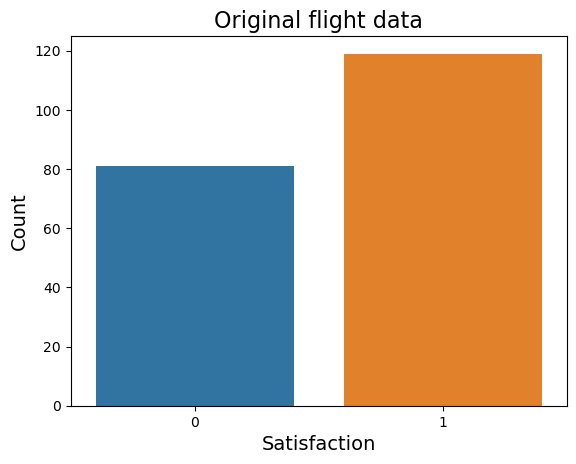

In [4]:
# Bar chart of satisfaction from 100 random customer satisfaction surveys
p = sns.countplot(data=airlines, x='Satisfaction')
p.set_xlabel('Satisfaction', fontsize=14)
p.set_ylabel('Count', fontsize=14)
p.set_title('Original flight data', fontsize=16)

In [5]:
# Use resample() to create a single bootstrap sample
bootSample = resample(airlines['Satisfaction'], replace=True)

Text(0.5, 1.0, 'Bootstrap sample')

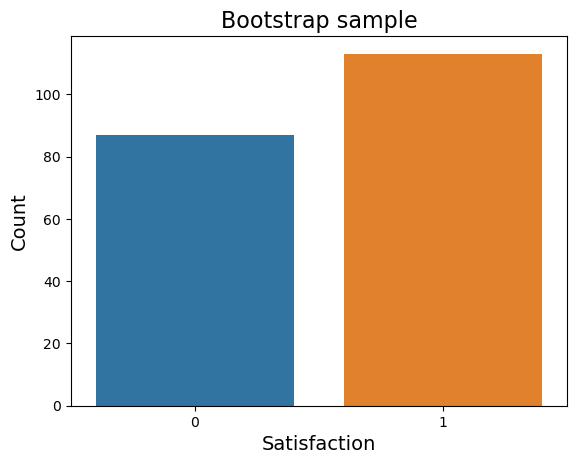

In [6]:
# Distribution of bootstrap sample is similar, but not identical, to original sample
p = sns.countplot(x=bootSample)
p.set_xlabel('Satisfaction', fontsize=14)
p.set_ylabel('Count', fontsize=14)
p.set_title('Bootstrap sample', fontsize=16)

In [7]:
# Counts of bootstrap sample are similar to descriptive statistics for original distances
bootSample.value_counts()

1    113
0     87
Name: Satisfaction, dtype: int64

In [8]:
# How does the sample proportion and number of out-of-bag instances vary for 1000 bootstrap samples?

bootstrapProps = []
bootstrapNOOB = []

for i in range(0, 1000):
    # Create the bootstrap sample
    bootstrapSample = resample(airlines['Satisfaction'], replace=True)
    oob = airlines['Satisfaction'][~airlines['Satisfaction'].index.isin(bootstrapSample.index)]

    # Calculate the bootstrap sample proportions
    prop = bootstrapSample.mean()
    bootstrapProps.append(prop)
                               
    # Calculate the number of out-of-bag instances
    noob = len(oob)
    bootstrapNOOB.append(noob)

Text(0.5, 1.0, '1000 bootstrap samples')

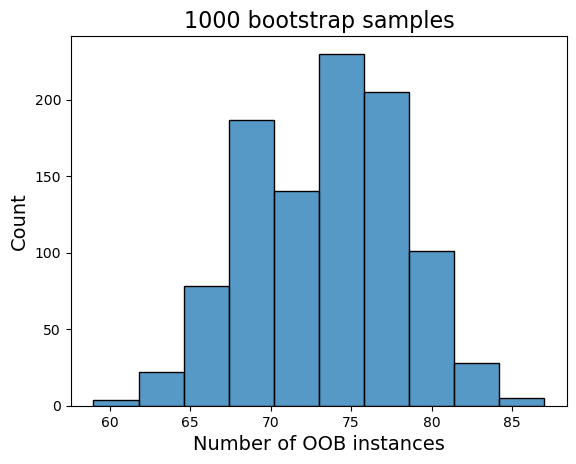

In [9]:
# Histogram of number of out-of-bag instances for 1000 bootstrap samples
p = sns.histplot(bootstrapNOOB, bins=10)
p.set_xlabel('Number of OOB instances', fontsize=14)
p.set_ylabel('Count', fontsize=14)
p.set_title('1000 bootstrap samples', fontsize=16)

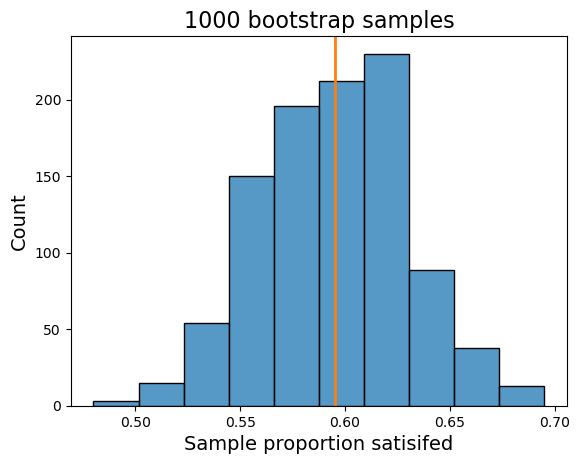

In [10]:
# Histogram of proportions for 1000 bootstrap samples
p = sns.histplot(bootstrapProps, bins=10)
p.set_xlabel('Sample proportion satisifed', fontsize=14)
p.set_ylabel('Count', fontsize=14)
p.set_title('1000 bootstrap samples', fontsize=16)

# Add original proportion satisfied
plt.axvline(airlines['Satisfaction'].mean(), color='#ff7f0e', linewidth=2)

In [11]:
round(pd.DataFrame(bootstrapProps).describe(), 2)

,0
count,1000.00
mean,0.60
std,0.03
min,0.49
25%,0.57
50%,0.60
75%,0.62
max,0.71
